In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


In [2]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape

(64461, 61)

In [3]:
pd.set_option('display.max_columns', 6) # number of Colums
pd.set_option('display.max_rows', None) # number of Rows

                                            Data Processing 

In [4]:
#function sorts data by growth/by reduction 
def sort_dict_by_value(Dictionary, reverse = False):       
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

In [5]:
#function to build barchart
def Build_Barh( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible,title):
    
    fig, ax = plt.subplots()


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # accuracy of percentage 


    plt.barh(langs, langs_users_num)  # drawing itself
    plt.yticks(range(len(langs)), new_labels) # depiction of percentage and Layout of axes 
        
        
    for spine in ax.spines.values():    #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   #style of drawing

    plt.title(title)  # add title

    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)


    plt.show()

In [6]:
def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # accuracy of percentage 


    plt.barh(langs, langs_users_num)  # drawing itself
    plt.yticks(range(len(langs)), new_labels) # depiction of percentage and Layout of axes 



    for spine in ax.spines.values():     #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  #putting/removing values on x Axis
    ax.axes.get_xaxis().set_visible(x_axis_visible)  #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   #style of drawing
    
    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

In [7]:
def Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}'.format(j) for i, j in zip(langs, Quantity)]   # accuracy of percentage 


    plt.barh(langs, langs_users_num)   # drawing itself
    plt.yticks(range(len(langs)), new_labels) # depiction of percentage and Layout of axes 



    for spine in ax.spines.values():      #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)   #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   #style of drawing

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()


In [8]:
def Build_Barh_sizes_percentage (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, Quantity)] # accuracy of percentage 


    plt.barh(langs, langs_users_num)    # drawing itself
    plt.yticks(range(len(langs)), new_labels)  # depiction of percentage and Layout of axes 



    for spine in ax.spines.values():     #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible) #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   #style of drawing

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()

In [55]:
#creating the function where is written logics for sorting data
def logics_for_10_to_30or_older(data_to_sort):
   #Creating empty lists with specific ages where the related data will be placed 
    younger_10 = []
    from_10_to_11 = []
    from_12_to_13 = []
    from_14_to_15 = []
    from_16_to_17 = []
    from_18_to_19 = []
    from_20_to_21 = []
    from_22_to_23 = []
    from_24_to_25 = []
    from_26_to_27 = [] 
    from_28_to_29 = []
    thirty_or_older = []

    #adding data to related lists 
    for i in data_to_sort:
        if int(i) in list(range(0,10)):
            younger_10.append(i)
        elif int(i) in list(range(10,12)):
            from_10_to_11.append(i)
        elif int(i) in list(range(12,14)):
            from_12_to_13.append(i)
        elif int(i) in list(range(14,16)):
            from_14_to_15.append(i)
        elif int(i) in list(range (16,18)):
            from_16_to_17.append(i)
        elif int(i) in list(range(18,20)):
            from_18_to_19.append(i)
        elif int(i) in list(range (20,22)):
            from_20_to_21.append(i)
        elif int(i) in list(range (22,24)):
            from_22_to_23.append(i)
        elif int(i) in list(range (24,26)):
            from_24_to_25.append(i)
        elif int(i) in list(range(26,28)):
            from_26_to_27.append(i)
        elif int(i) in list(range(28,30)):
            from_28_to_29.append(i)
        else:
            thirty_or_older.append(i)

    #defining length of the lists that have been created after adding data 
    len_younger_10 = len(younger_10)
    len_from_10_to_11 = len(from_10_to_11)
    len_from_12_to_13 = len(from_12_to_13)
    len_from_14_to_15 = len(from_14_to_15)
    len_from_16_to_17 = len(from_16_to_17)
    len_from_18_to_19 = len(from_18_to_19)
    len_from_20_to_21 = len(from_20_to_21)
    len_from_22_to_23 = len(from_22_to_23)
    len_from_24_to_25 = len(from_24_to_25)
    len_from_26_to_27 = len(from_26_to_27) 
    len_from_28_to_29 = len(from_28_to_29)
    len_thirty_or_older = len(thirty_or_older)

            
    global key_Phrases  #declaring key phrases as global 
    global Quantity     #declaring Quantity as global 

    #writing the key phrases and quantity iformation by hand 
    # where the key phrases are presented as list with specific ages in it 
    #and quantity is the list with the length of the lists where the data was added 
    key_Phrases = ["Younger than 10 years", "10 to 11 years old", "12 to 13 years old", "14 to 15 years old", "16 to 17 years old", 
                    "18 to 19 years old", "20 to 21 years old", "22 to 23 years old", "24 to 25 years old", "26 to 27 years old", 
                    "28 to 29 years old", "30 years old or older"]
    Quantity = [ len_younger_10, len_from_10_to_11 ,len_from_12_to_13, len_from_14_to_15, len_from_16_to_17, len_from_18_to_19,
                 len_from_20_to_21, len_from_22_to_23, len_from_24_to_25, len_from_26_to_27, len_from_28_to_29, len_thirty_or_older]



                                                 Function of list sorting 

In [56]:
def list_sorter_counter(filtered_list):
  
  global key_Phrases    #declaring as global to be used in different functions
  global Quantity        #declaring as global to be used in different functions
  

  union = []                          # empty list(just like my life)

  for i in filtered_list:
      for k in i :                    # adds data in list named union
          union.append(k)

  Counted = Counter(union)             #writing in dictionary and counting  the number of answers 



  Counted = sort_dict_by_value(Counted, False)  #sorting data by growth/by reduction 

  #empty lists to add related data later
  key_Phrases = []  
  Quantity = []  

  

  items = Counted.items()    #  #rewriting data into listsy
  #adding key phrases and quantity to relevant empty list
  for item in items:       
      key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
      Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity 

In [57]:
#creating the function where is written logics for sorting data
def logics_for_less_than_5s(data_name):
    #Creating empty lists with specific ages where the related data will be placed 
    less_than_5 = []
    five_to_9 = []
    ten_to_14 = []
    fifteen_to_19 = []
    twenty_to_24 = []
    twentyfive_to_29 = []
    thirty_to_34 = []
    thirtyfive_to_39 = []
    fourty_to_44 = []
    fourtyfive_to_49 = []
    fifty_or_more = []

    #adding data to related lists 
    for i in data_name:
        if int(i) in list(range(0,5)):
            less_than_5.append(i)
        elif int(i) in list(range(5,10)):
            five_to_9.append(i)
        elif int(i) in list(range(10,15)):
            ten_to_14.append(i)
        elif int(i) in list(range(15,20)):
            fifteen_to_19.append(i)
        elif int(i) in list(range (20,25)):
            twenty_to_24.append(i)
        elif int(i) in list(range(25,30)):
            twentyfive_to_29.append(i)
        elif int(i) in list(range (30,35)):
            thirty_to_34.append(i)
        elif int(i) in list(range (35,40)):
            thirtyfive_to_39.append(i)
        elif int(i) in list(range (40,45)):
            fourty_to_44.append(i)
        elif int(i) in list(range(45,50)):
            fourtyfive_to_49.append(i)
        else:
            fifty_or_more.append(i)

    #defining length of the lists that have been created after adding data 
    len_less_than_5 = len(less_than_5)
    len_five_to_9 = len(five_to_9)
    len_ten_to_14 = len(ten_to_14)
    len_fifteen_to_19 = len(fifteen_to_19)
    len_twenty_to_24 = len(twenty_to_24)
    len_twentyfive_to_29 = len(twentyfive_to_29)
    len_thirty_to_34 = len(thirty_to_34)
    len_thirtyfive_to_39 = len(thirtyfive_to_39)
    len_fourty_to_44 = len(fourty_to_44)
    len_fourtyfive_to_49 = len(fourtyfive_to_49)
    len_fifty_or_more = len(fifty_or_more)
    
    global key_Phrases  #declaring key phrases as global 
    global Quantity     #declaring Quantity as global 

    #writing the key phrases and quantity iformation by hand 
    # where the key phrases are presented as list with specific ages in it 
    #and quantity is the list with the length of the lists where the data was added 
    key_Phrases = ["Less than 5 years", "5 to 9 years", "10 to 14 years", "15 to 19 years", "20 to 24 years", "25 to 29 years", 
                 "30 to 34 years", "35 to 39 years", "40 to 44 years", "45 to 49 years", "50 years or more"]
    Quantity = [len_less_than_5, len_five_to_9, len_ten_to_14, len_fifteen_to_19, len_twenty_to_24, len_twentyfive_to_29,
               len_thirty_to_34, len_thirtyfive_to_39, len_fourty_to_44, len_fourtyfive_to_49, len_fifty_or_more ]

In [77]:
#creating the function where is written logics for sorting data
def logics_for_ages(age):
    #Creating empty lists with specific ages where the related data will be placed  
    less_than_15 = []
    fifteen_to_19 = []
    twenty_to_24 = []
    twentyfive_to_29 = []
    thirty_to_34 = []
    thirtyfive_to_39 = []
    fourty_to_44 = []
    fourtyfive_to_49 = []
    fifty_to_54 = []
    fiftyfive_to_59 = []
    more_than_60 = []

    #adding data to related lists 
    for i in age:
        if int(i) in list(range(0,15)):
            less_than_15.append(i)
        elif int(i) in list(range(15,20)):
            fifteen_to_19.append(i)
        elif int(i) in list(range(20,25)):
            twenty_to_24.append(i)
        elif int(i) in list(range(25,30)):
            twentyfive_to_29.append(i)
        elif int(i) in list(range (20,25)):
            twenty_to_24.append(i)
        elif int(i) in list(range(25,30)):
            twentyfive_to_29.append(i)
        elif int(i) in list(range (30,35)):
            thirty_to_34.append(i)
        elif int(i) in list(range (35,40)):
            thirtyfive_to_39.append(i)
        elif int(i) in list(range (40,45)):
            fourty_to_44.append(i)
        elif int(i) in list(range(45,50)):
            fourtyfive_to_49.append(i)
        elif int(i) in list(range(50,55)):
            fifty_to_54.append(i)
        elif int(i) in list(range(55,60)):
            fiftyfive_to_59.append(i)
        else:
            more_than_60.append(i)
    #defining length of the lists that have been created after adding data  
    len_less_than_15 = len(less_than_15)
    len_fifteen_to_19 = len(fifteen_to_19)
    len_twenty_to_24 = len(twenty_to_24)
    len_twentyfive_to_29 = len(twentyfive_to_29)
    len_thirty_to_34 = len(thirty_to_34)
    len_thirtyfive_to_39 = len(thirtyfive_to_39)
    len_fourty_to_44 = len(fourty_to_44)
    len_fourtyfive_to_49 = len(fourtyfive_to_49)
    len_fifty_to_54 = len(fifty_to_54)
    len_fiftyfive_to_59 = len(fiftyfive_to_59)
    len_more_than_60 = len(more_than_60)
    
    global key_Phrases    #declaring key phrases as global 
    global Quantity       #declaring Quantity as global 

    #writing the key phrases and quantity iformation by hand 
    # where the key phrases are presented as list with specific ages in it 
    #and quantity is the list with the length of the lists where the data was added  
    key_Phrases = ["Less than 15 years", "15 to 19 years", "20 to 24 years", "25 to 29 years", "30 to 34 years", "25 to 39 years", 
                 "40 to 44 years", "45 to 49 years", "50 to 54 years", "55 to 59 years", "60 years or more"]
    Quantity = [len_less_than_15, len_fifteen_to_19, len_twenty_to_24, len_twentyfive_to_29, len_thirty_to_34, len_thirtyfive_to_39,
               len_fourty_to_44, len_fourtyfive_to_49, len_fifty_to_54, len_fiftyfive_to_59, len_more_than_60 ]


                                            Working With data istelf 
                                        

                                               Developer Type 

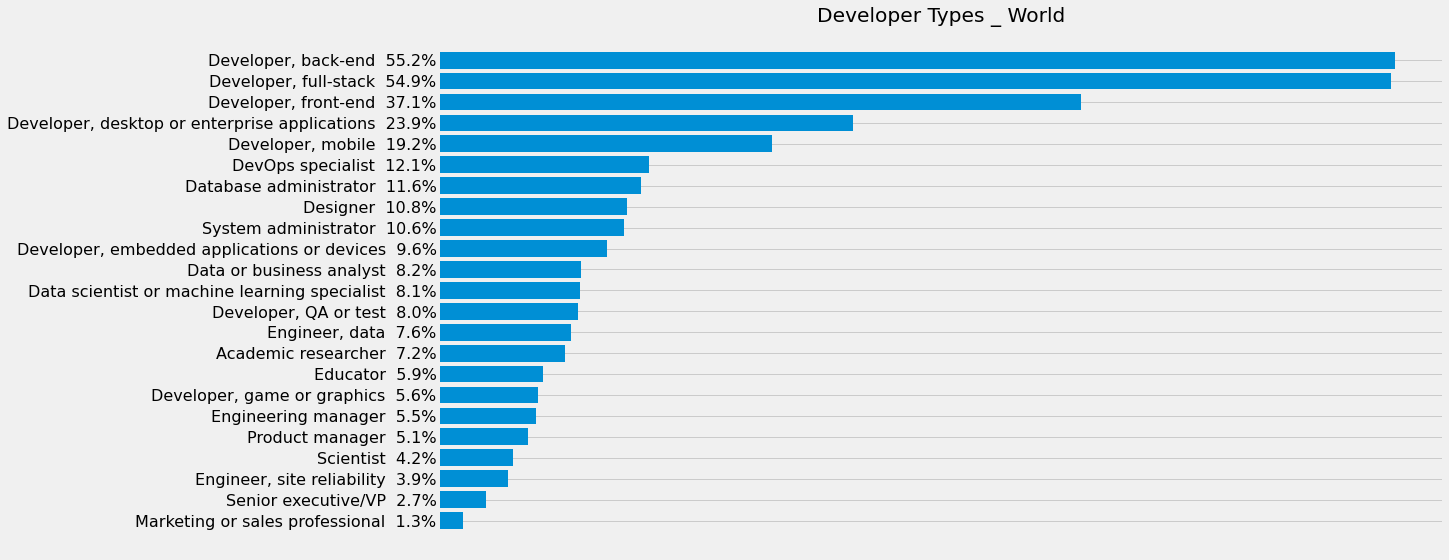

In [58]:
DevType= data["DevType"]  #calling data from "Devtype"
DevType.dropna(inplace =True) #filtering the data from empty and unnecessary answers
DevType = DevType.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(DevType) #autosorting

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types _ World") #building barchart

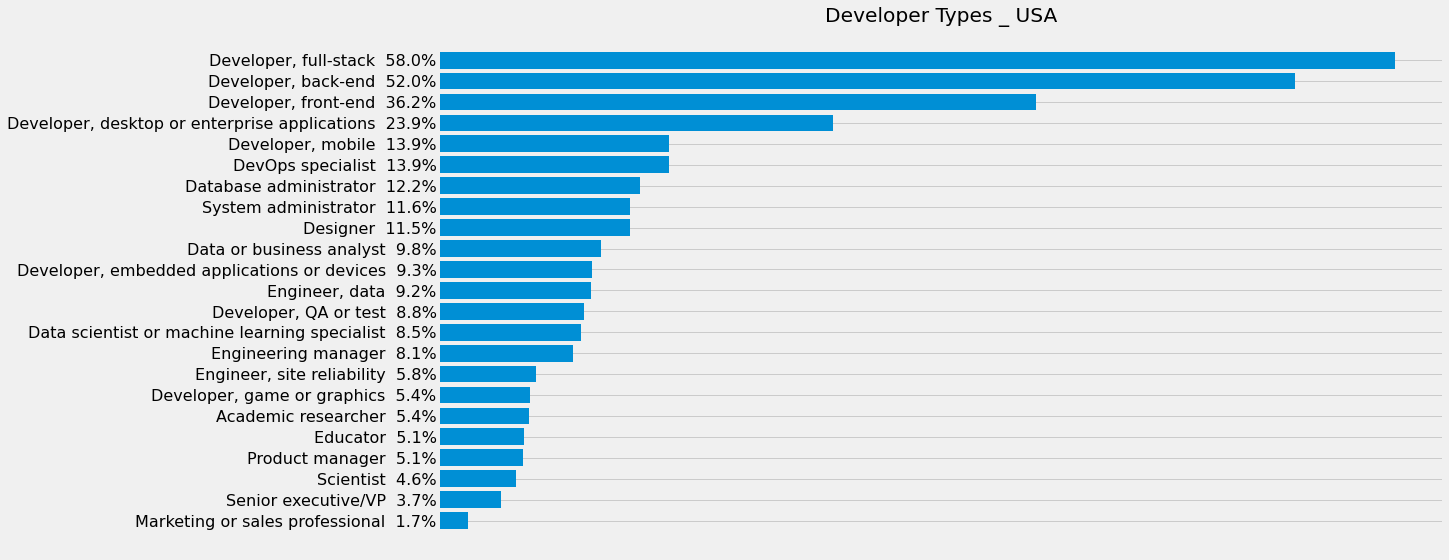

In [59]:
DevType= data["DevType"]  #calling data from "Devtype"
DevType.dropna(inplace =True) #filtering the data from empty and unnecessary answers

new_data = data[(DevType != "nan") & (data["Country"] == "United States")] #combining data from USA and devtype
New_data = new_data["DevType"] #writing comnined data in a new variable
New_data = New_data.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(New_data)

Build_Barh_sizes( key_Phrases , Quantity, New_data ,"fivethirtyeight", False , (16,9), "Developer Types _ USA") #building barchart

                                                Coding as a hobby

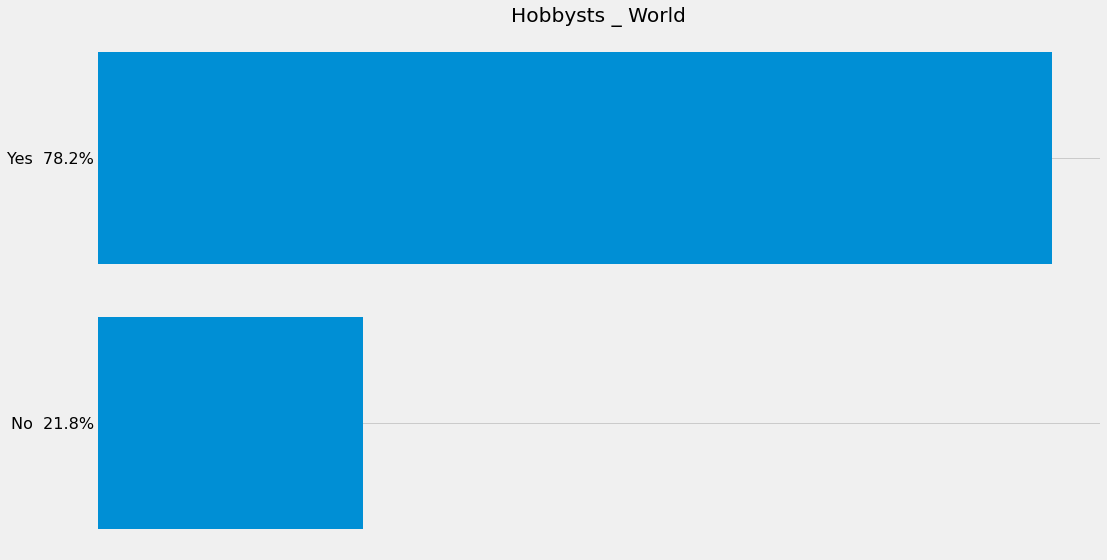

In [60]:
hobbysts = data["Hobbyist"]  #calling data from "Hobbyist"
hobbysts.dropna(inplace = True) #filtering the data from empty and unnecessary answers

counted = Counter(hobbysts)  #writing in dictionary and counting 

#empty lists to add related data later 
key_Phrases = []
Quantity = []

items = counted.items() #rewritin =g data into lists

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()   

Build_Barh_sizes( key_Phrases , Quantity, hobbysts ,"fivethirtyeight", False , (16,9), "Hobbysts _ World") #building barchart


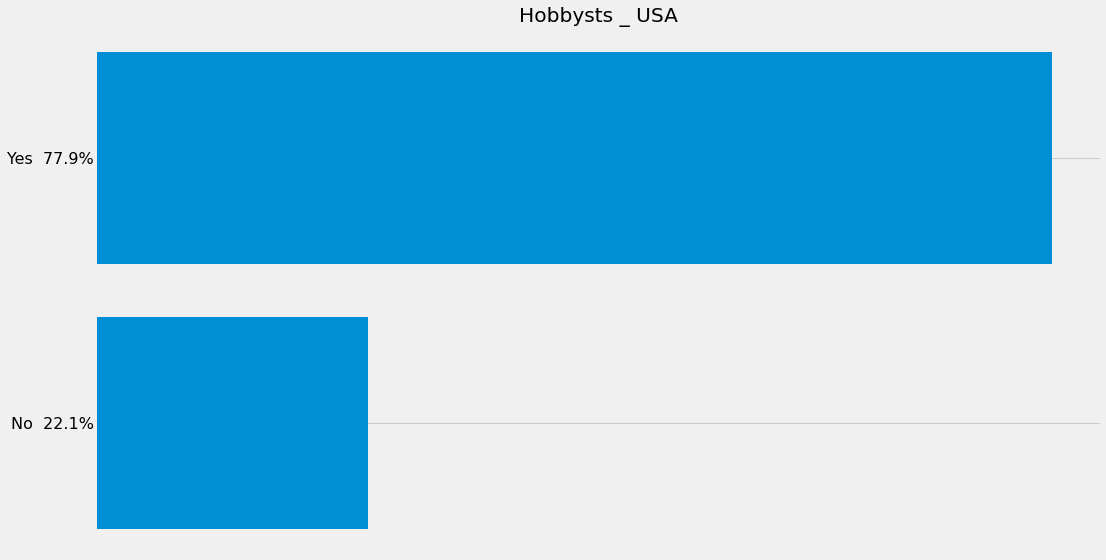

In [61]:
hobbysts = data["Hobbyist"]  #calling data from "Hobbyist"
hobbysts.dropna(inplace = True) #filtering the data from empty and unnecessary answers

new_data = data[(hobbysts != "nan") & (data["Country"] == "United States")] #combining Hobbyist and USA's data 
New_data = new_data["Hobbyist"] #writing comnined data in a new variable

counted = Counter(New_data) #writing in dictionary and counting 

#empty lists to add related data later 
key_Phrases = []
Quantity = []

items = counted.items() #rewritin =g data into lists

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0]) #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])    #the data that is placed at "1" appends on Quantity

#reversing key phrases and quantity
key_Phrases.reverse() 
Quantity.reverse()    

Build_Barh_sizes( key_Phrases , Quantity, New_data ,"fivethirtyeight", False , (16,9), "Hobbysts _ USA") #building barchart



                                        Years Since Learning to Code

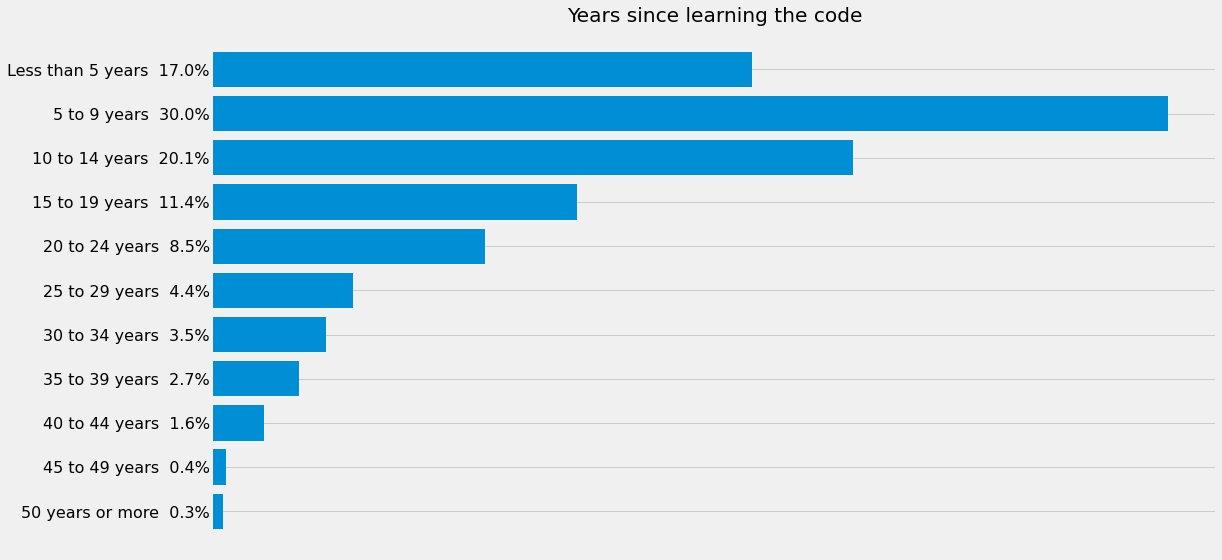

In [62]:
years_of_coding =  data["YearsCode"]  #calling data from years of coding
years_of_coding.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

years_of_coding = np.array(years_of_coding) #transfers data in list
years_of_coding = np.where( years_of_coding == "Less than 1 year" , 1, years_of_coding) # changing "less than 1 year" variable as 1 year
years_of_coding = np.where(years_of_coding == "More than 50 years", 50, years_of_coding) # changing "more then 50 years" variable as 50 years


logics_for_less_than_5s(years_of_coding) #automatically sorting data with function

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes( key_Phrases , Quantity, years_of_coding ,"fivethirtyeight", False , (16,9), "Years since learning the code") #building barchart


                                        Professionally Coding

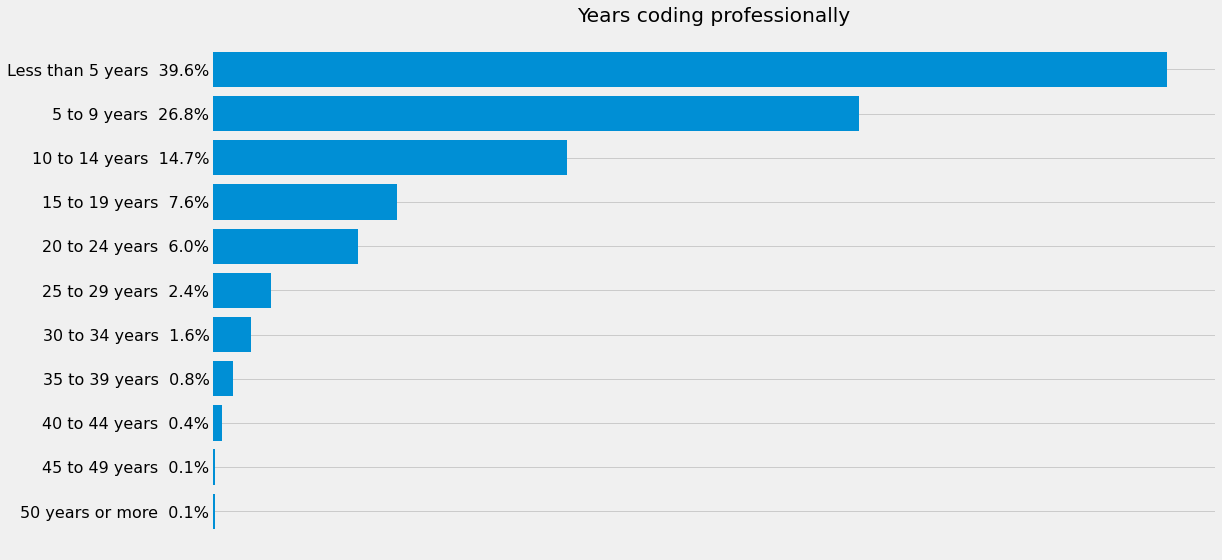

In [63]:
years_code_pro = data["YearsCodePro"] #calling data from years of coding
years_code_pro.dropna(inplace = True) #filtering the data from empty and unnecessary answers

years_code_pro = np.array(years_code_pro)  #transfers data in list
years_code_pro = np.where(years_code_pro == "Less than 1 year", 1, years_code_pro) # changing "less than 1 year" variable as 1 year
years_code_pro = np.where(years_code_pro == "More than 50 years", 50, years_code_pro) # changing "more then 50 years" variable as 50 years

logics_for_less_than_5s(years_code_pro)  #automatically sorting data with function

#reversing key phrases and Quantity 
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes( key_Phrases , Quantity, years_code_pro ,"fivethirtyeight", False , (16,9), "Years coding professionally") #building barchart


                                            Writing that first line of code

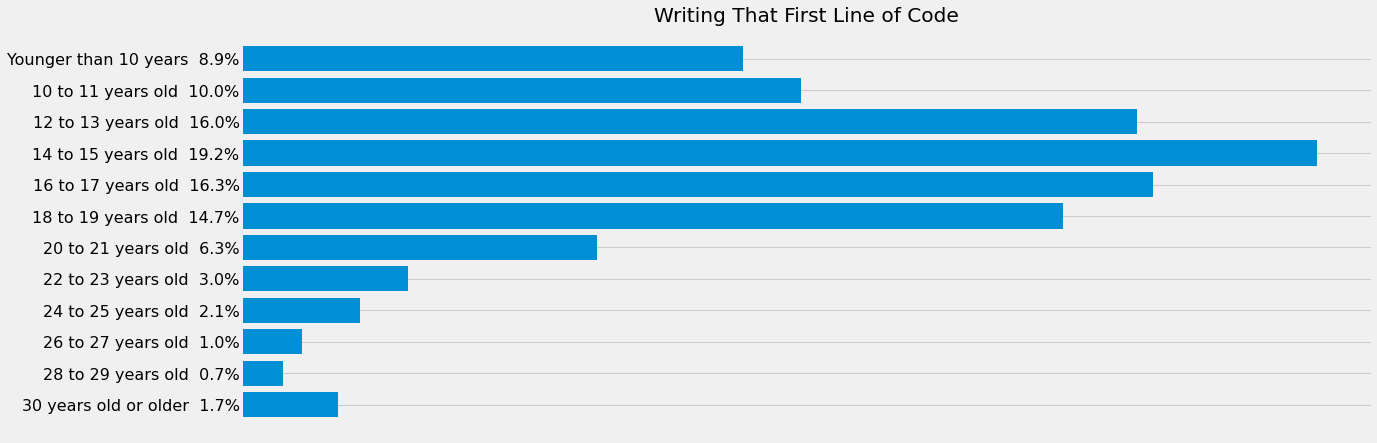

In [64]:
age_1st_code = data["Age1stCode"]  #calling data fromm age of first code 
age_1st_code.dropna(inplace = True) #filtering the data from empty and unnecessary answers

age_1st_code =  np.array(age_1st_code)  #transfers data in list
age_1st_code = np.where(age_1st_code == "Younger than 5 years", "1", age_1st_code) # changing "Younger than 5" variable as 1 year
age_1st_code = np.where(age_1st_code == "Older than 85", "30", age_1st_code)   # changing "Older than 85" variable as 30 years

#calling the function to sort the data
logics_for_10_to_30or_older(age_1st_code)

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, age_1st_code, "fivethirtyeight", False , (18,7), "Writing That First Line of Code") #building barchart


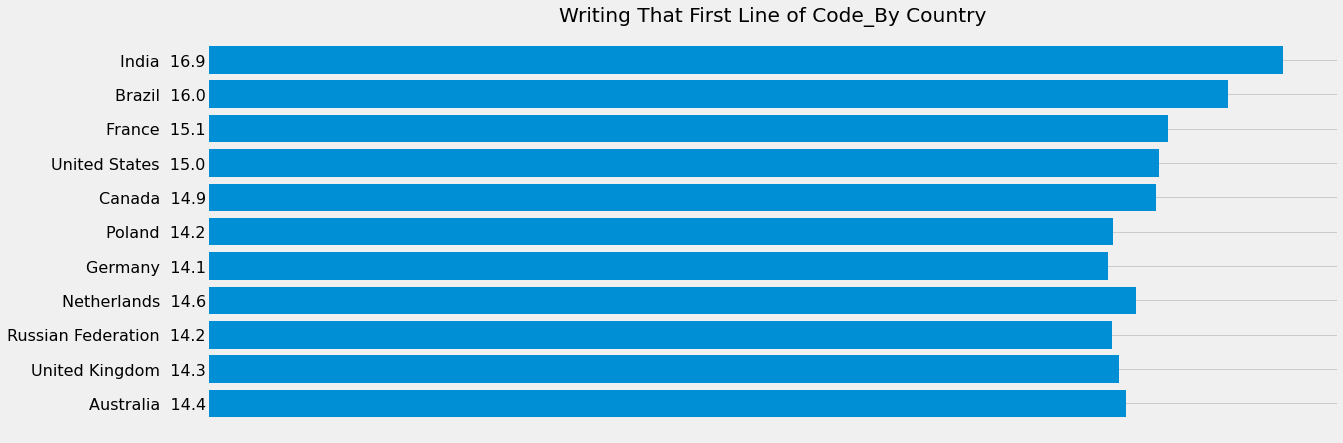

In [65]:
writing_1st_linecode = data["Age1stCode"]    #calling data from age of first code 
writing_1st_linecode.dropna(inplace = True) #filtering the data from empty and unnecessary answers

#creating list which contains countries that I want to get data from
countries = ["India"  , "Brazil" , "France" , "United States" , "Canada" , "Poland" , "Germany" , "Netherlands" , "Russian Federation" , "United Kingdom", "Australia"]

#empty lists to add related data later
key_Phrases=[]    
Quantity=[]



for i in countries:
    writing_1st_linecode_by_countries =  data[(writing_1st_linecode != "nan") & (data["Country"] == i) ]  #combining datas from first code age and country from previous list. 

    Writing_1st_linecode_by_countries = np.array(writing_1st_linecode_by_countries["Age1stCode"])  #transfers data in list
    Writing_1st_linecode_by_countries = np.where(Writing_1st_linecode_by_countries == "Younger than 5 years", 5, Writing_1st_linecode_by_countries) # changing "Younger than 5" variable as 5 year
    Writing_1st_linecode_by_countries = np.where(Writing_1st_linecode_by_countries == "Older than 85", 85,Writing_1st_linecode_by_countries ) # changing "Older than 85" variable as 85 years

    Writing_1st_linecode_by_countries = list(map( int, Writing_1st_linecode_by_countries)) #changing variables from string to integers

    number_of_people = len(Writing_1st_linecode_by_countries)  #number of respodents
    sum_all_ages = sum(Writing_1st_linecode_by_countries)      #sum all ages

    average_age = (sum_all_ages / number_of_people)   #calculating average age

    key_Phrases.append(i)   #adding counties from previous list as key phrases
    Quantity.append(average_age)  #adding average ages to quantity list

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

    
Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code_By Country" ) #building barchart

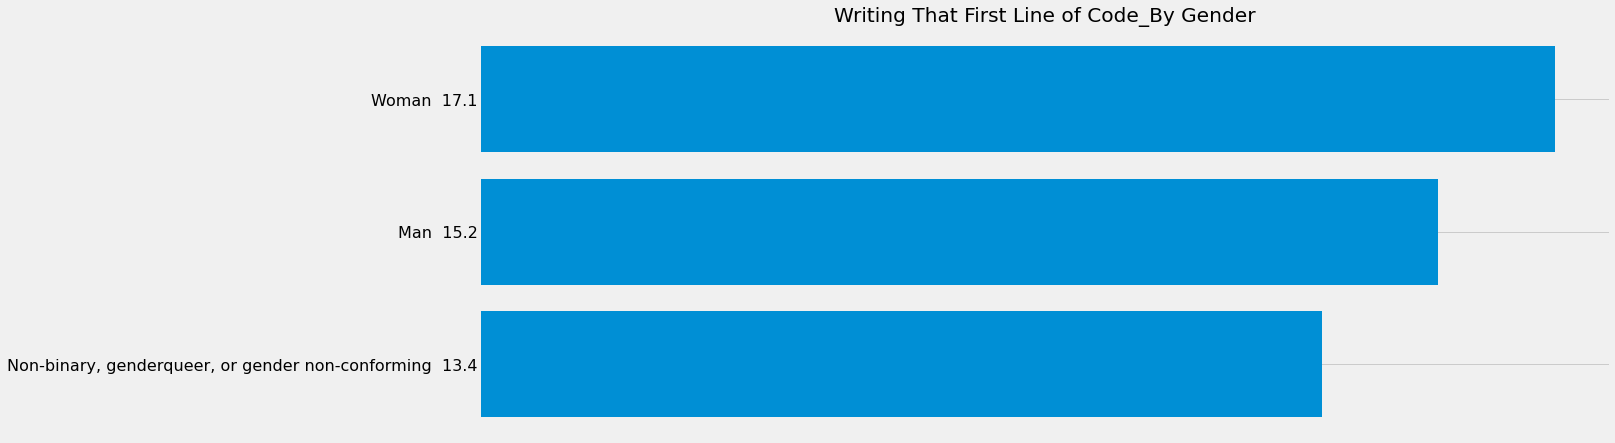

In [66]:
writing_1st_linecode = data["Age1stCode"] #calling data from age of first code 
writing_1st_linecode.dropna(inplace = True) #filtering the data from empty and unnecessary answers

#creating list which contains gender that I want to get data from
gender = ["Woman", "Man", "Non-binary, genderqueer, or gender non-conforming"]

#empty lists to add related data later
key_Phrases = []
Quantity = []

for i in gender:
    writing_1st_linecode_gender = data[(writing_1st_linecode != "nan")  & (data["Gender"] == i)] #combining datas from first code age and gender from previous list. 

    Writing_1st_linecode_gender = np.array(writing_1st_linecode_gender["Age1stCode"]) #transfers data in list
    Writing_1st_linecode_gender = np.where(Writing_1st_linecode_gender == "Younger than 5 years", 5, Writing_1st_linecode_gender)  # changing "Younger than 5" variable as 5 year
    Writing_1st_linecode_gender = np.where(Writing_1st_linecode_gender == "Older than 85", 85, Writing_1st_linecode_gender) # changing "Older than 85" variable as 85 years

    Writing_1st_linecode_gender = list(map(int, Writing_1st_linecode_gender)) #changing variables from string to integers

    number_of_people = len(Writing_1st_linecode_gender) #number of respodents
    ages_all = sum(Writing_1st_linecode_gender) #sum all ages 

    average_age =(ages_all / number_of_people)  #calculating average age

    key_Phrases.append(i)  #adding gender from previous list as key phrases
    Quantity.append(average_age) #adding average ages to quantity list

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()


Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code_By Gender" )  #building barchart

                                            Education

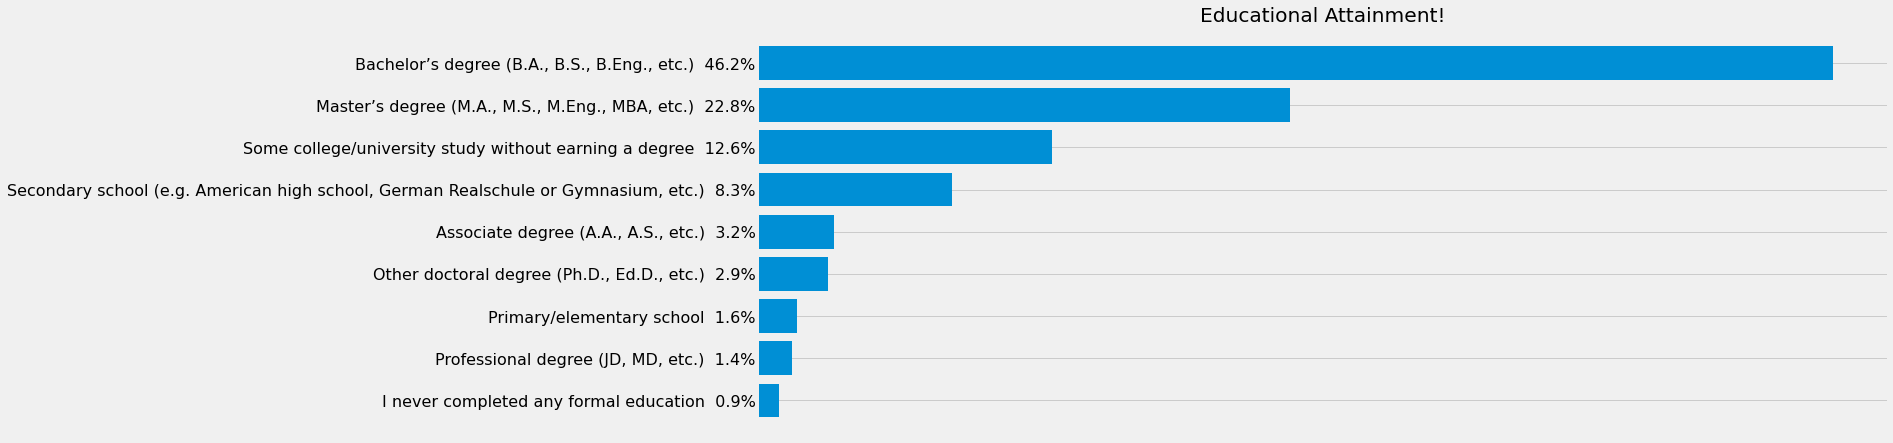

In [67]:
edu_level = data["EdLevel"]  #calling data fom educational level
edu_level.dropna(inplace = True) #filtering the data from empty and unnecessary answers

#writing relevant info for kay phrases by hand 
key_Phrases= ["I never completed any formal education", "Professional degree (JD, MD, etc.)" , "Primary/elementary school",
"Other doctoral degree (Ph.D., Ed.D., etc.)", "Associate degree (A.A., A.S., etc.)", "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", 
"Some college/university study without earning a degree", "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)", "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"]

counted = Counter(edu_level) #writing in dictionary and counting

Quantity = [] # list to save quantity


for i in key_Phrases:
    Quantity.append(counted[i]) #adding data in quantity that is relevant for info in key phrases


Build_Barh_sizes(key_Phrases, Quantity, edu_level, "fivethirtyeight", False , (18,7), "Educational Attainment!") #building barchart

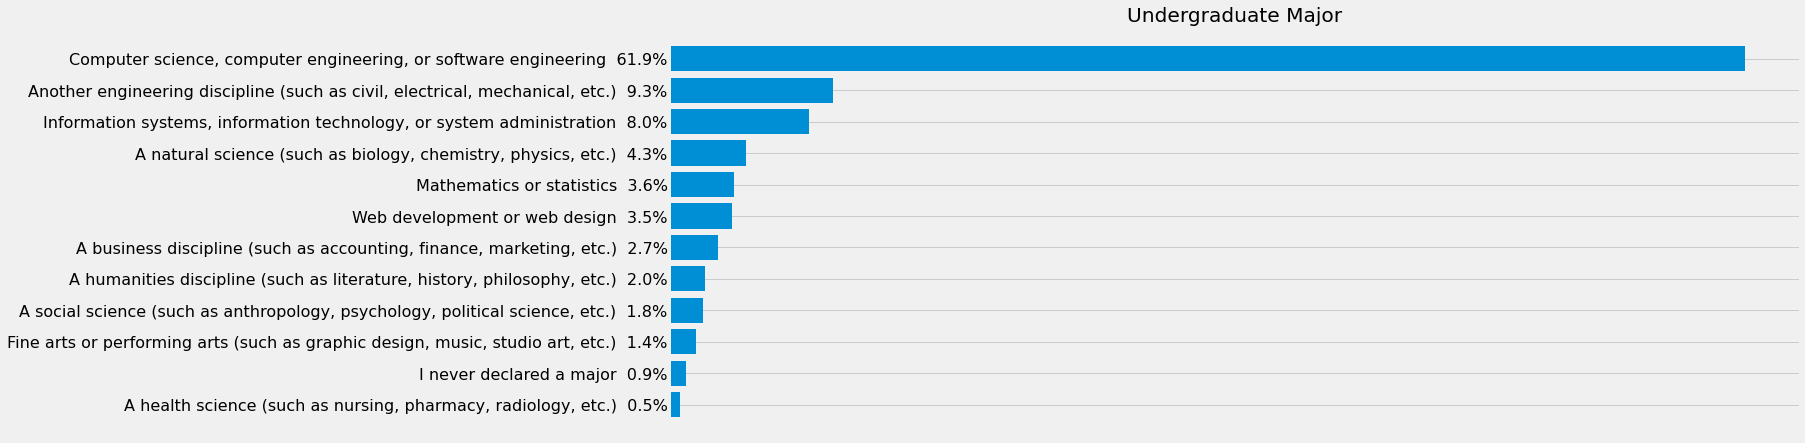

In [68]:
undergraduate_major = data["UndergradMajor"] #calling data from undergraduate major 
undergraduate_major.dropna(inplace = True ) #filtering the data from empty and unnecessary answers

counted = Counter(undergraduate_major) #writing in dictionary and counting 

Counted_sorted = sort_dict_by_value(counted, False) #sorting data by growth/by reduction 

items =  Counted_sorted.items()  #rewriting data into listsy

#empty lists to add related data later
key_Phrases = []
Quantity = []

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity 


Build_Barh_sizes(key_Phrases, Quantity, undergraduate_major, "fivethirtyeight", False , (18,7), "Undergraduate Major") #building barchart

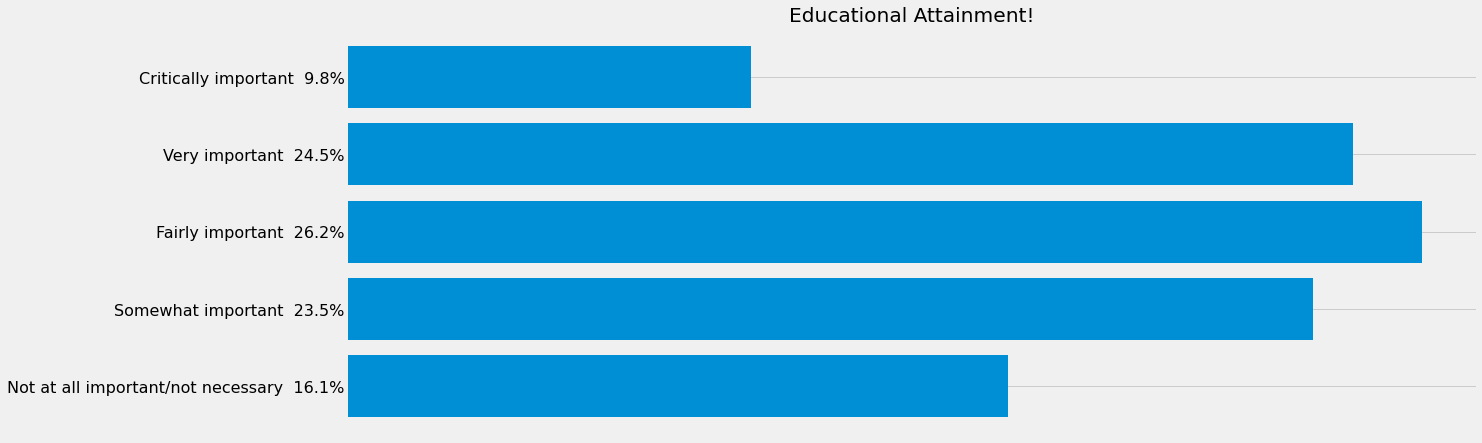

In [69]:
formal_edu = data["NEWEdImpt"] #calling data from  "NEWEdImpt"
formal_edu.dropna(inplace = True) #filtering the data from empty and unnecessary answers

counted = Counter(formal_edu) #writing in dictionary and counting 

#writing relevant info for key phrases by hand 
key_Phrases = ["Not at all important/not necessary", "Somewhat important","Fairly important", "Very important", "Critically important"]
Quantity = []   # list to save quantity

for i in key_Phrases:
    Quantity.append(counted[i]) #adding data in quantity that is relevant for info in key phrases

Build_Barh_sizes(key_Phrases, Quantity, formal_edu, "fivethirtyeight", False , (18,7), "Educational Attainment!") #building barchart

                                                Race and Ethnicity

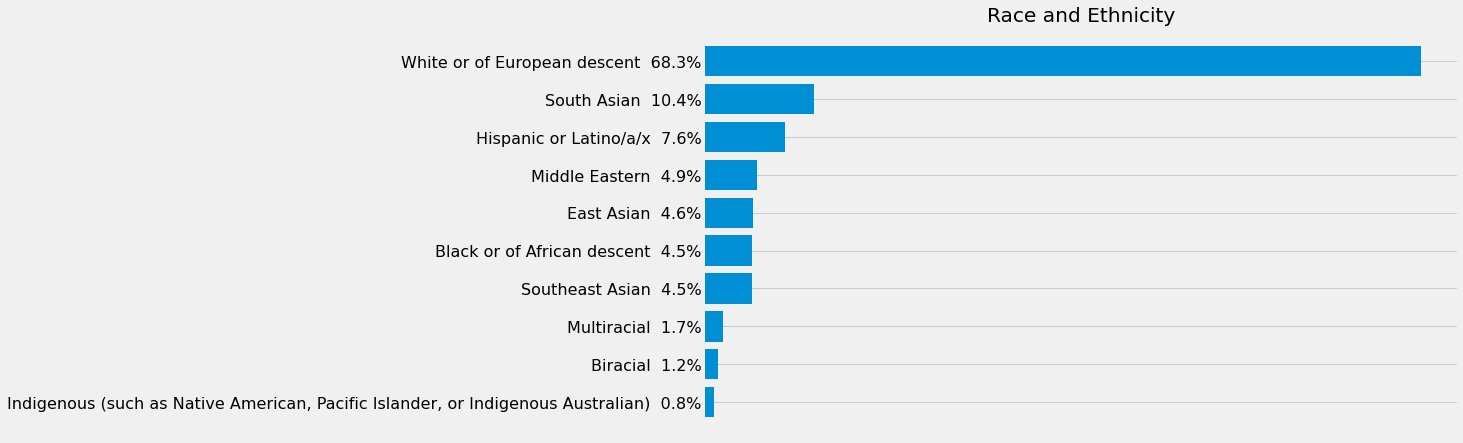

In [70]:
race_and_ethnicity = data["Ethnicity"] #calling data from ethnicity
race_and_ethnicity.dropna(inplace = True) #filtering the data from empty and unnecessary answers

race_and_ethnicity = race_and_ethnicity.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(race_and_ethnicity) #autosorting

Build_Barh_sizes(key_Phrases, Quantity, race_and_ethnicity, "fivethirtyeight", False , (12,7), "Race and Ethnicity") #building barchart

                                                 Gender 

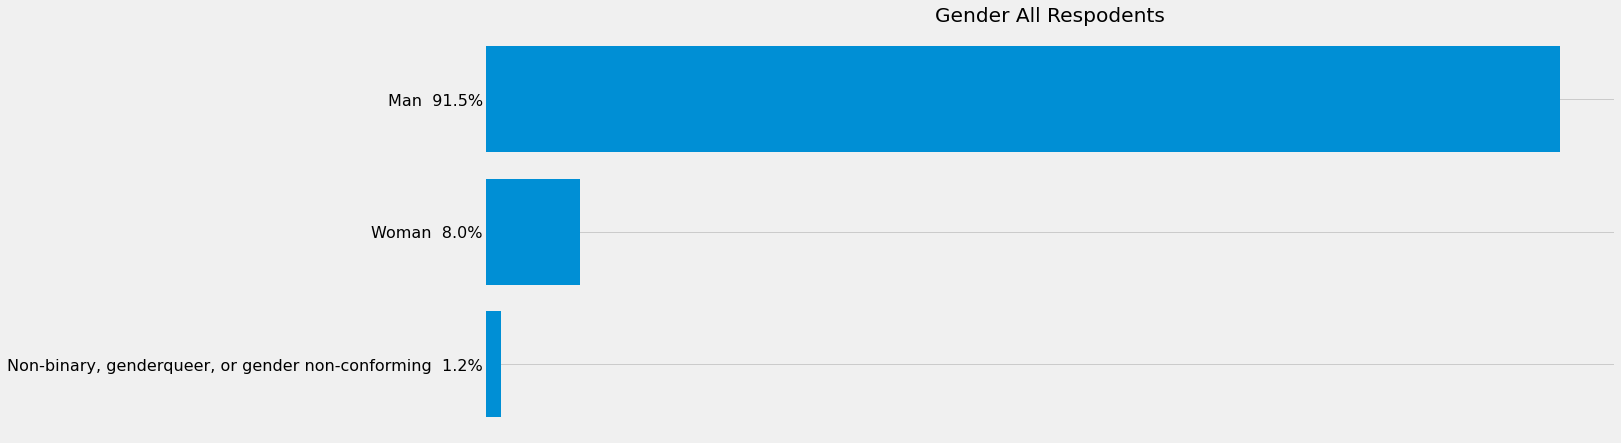

In [71]:
gender = data ["Gender"] #calling data from gender 
gender.dropna(inplace = True ) #filtering the data from empty and unnecessary answers

gender = gender.str.split(";")  #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(gender) #autosorting

Build_Barh_sizes(key_Phrases, Quantity, gender, "fivethirtyeight", False , (18,7), "Gender All Respodents") #building barchart

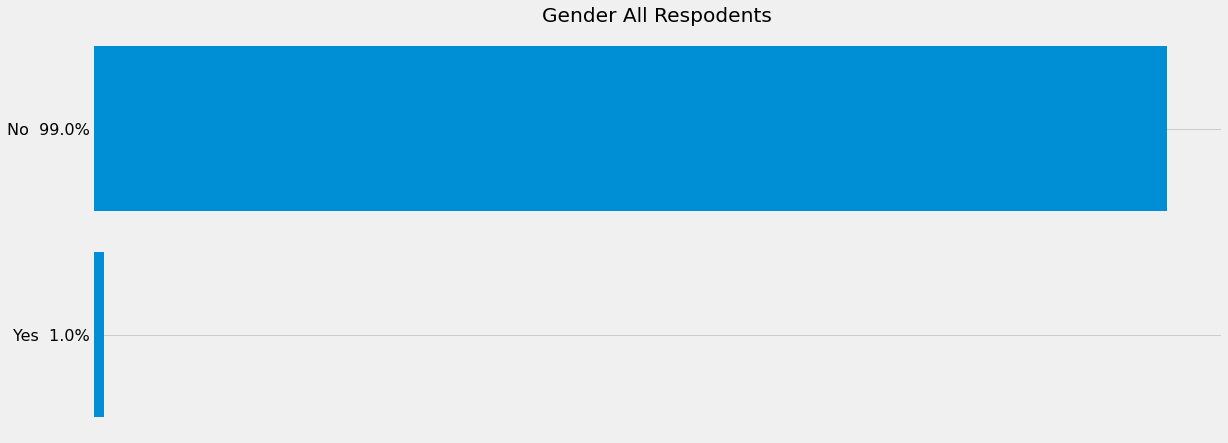

In [72]:
trans = data["Trans"] #calling data from "Trans" 
trans.dropna(inplace = True) #filtering the data from empty and unnecessary answers

counted  = Counter(trans) #writing in dictionary and counting 

#empty lists to add related data later
key_Phrases = []
Quantity = []

items = counted.items() #rewriting data into lists

#adding key phrases and quantity to relevant empty list
for item in items:       
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity 

#reversing key phrases and quantity 
key_Phrases.reverse()  
Quantity.reverse() 

Build_Barh_sizes(key_Phrases, Quantity, trans, "fivethirtyeight", False , (18,7), "Gender All Respodents") #building barchart

                                        Experience and Gender

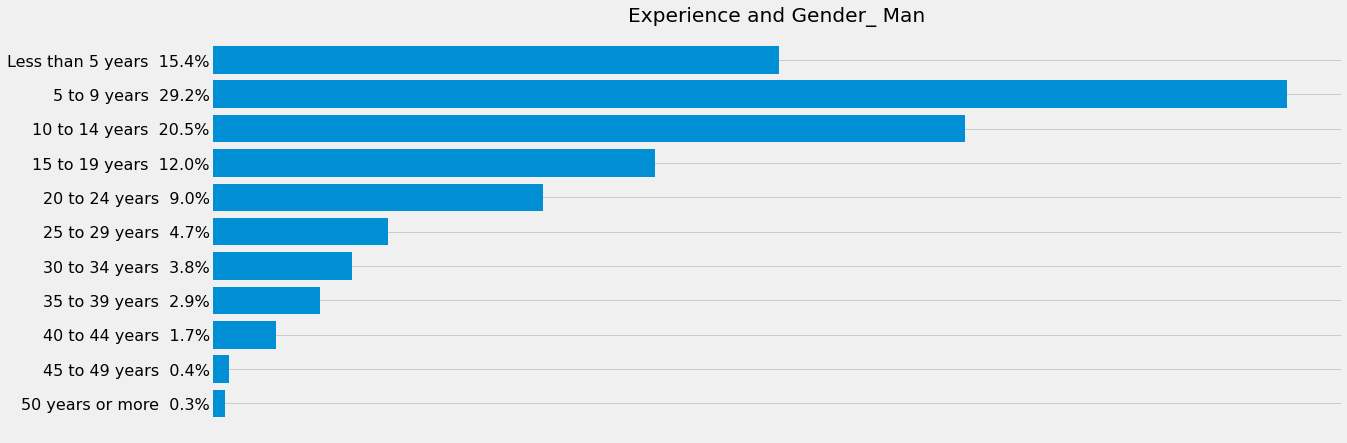

In [73]:
years_of_coding = data["YearsCode"]  #calling data from years of coding
years_of_coding.dropna(inplace = True) #filtering the data from empty and unnecessary answers

yearscode_men = data[(years_of_coding != "nan") & (data["Gender"] == "Man")] #combining years of coding and gender's data 
Yearscode_men = yearscode_men["YearsCode"] #save the combined data in new variable

Yearscode_men = np.where(Yearscode_men == "Less than 1 year", "1", Yearscode_men) # changing "less than 1 year" variable as 1 year
Yearscode_men = np.where(Yearscode_men == "More than 50 years", "50", Yearscode_men)  # changing "more then 50 years" variable as 50 years

#calling the function to sort the data
logics_for_less_than_5s(Yearscode_men)

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse() 

Build_Barh_sizes(key_Phrases, Quantity, Yearscode_men, "fivethirtyeight", False , (18,7), "Experience and Gender_ Man") #building barchart

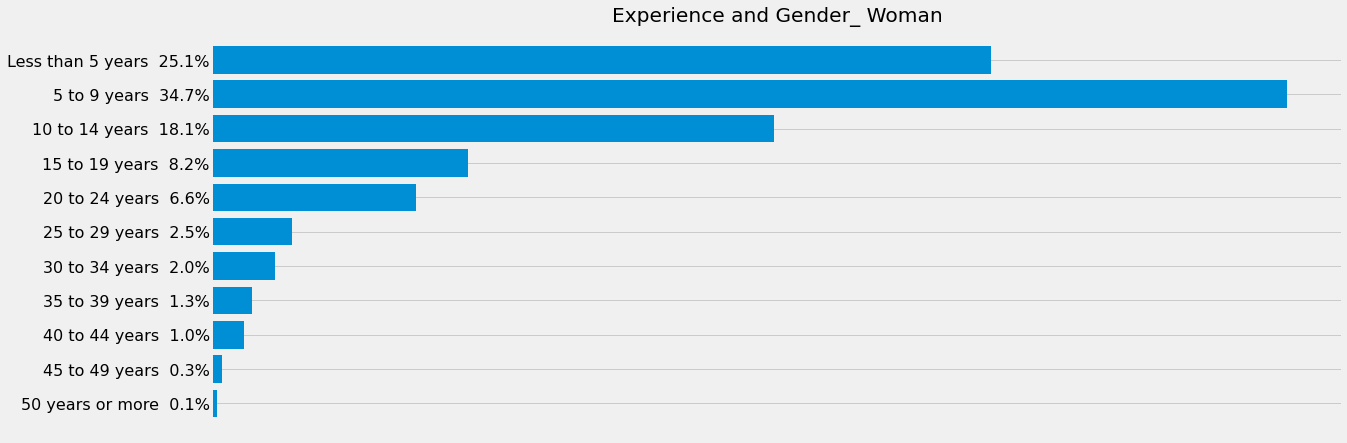

In [74]:
years_of_coding = data["YearsCode"] #calling data from years of coding
years_of_coding.dropna(inplace = True) #filtering the data from empty and unnecessary answers

yearscode_woman = data[(years_of_coding != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man") | 
(data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))]  #combining years of coding and gender's data 
Yearscode_woman = yearscode_woman["YearsCode"] #save the combined data in new variable

Yearscode_woman = np.where(Yearscode_woman == "Less than 1 year", "1", Yearscode_woman) # changing "less than 1 year" variable as 1 year
Yearscode_woman = np.where(Yearscode_woman == "More than 50 years", "50", Yearscode_woman) # changing "more then 50 years" variable as 50 years

#calling the function to sort the data
logics_for_less_than_5s(Yearscode_woman)

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse() 

Build_Barh_sizes(key_Phrases, Quantity, Yearscode_woman, "fivethirtyeight", False , (18,7), "Experience and Gender_ Woman") #building barchart

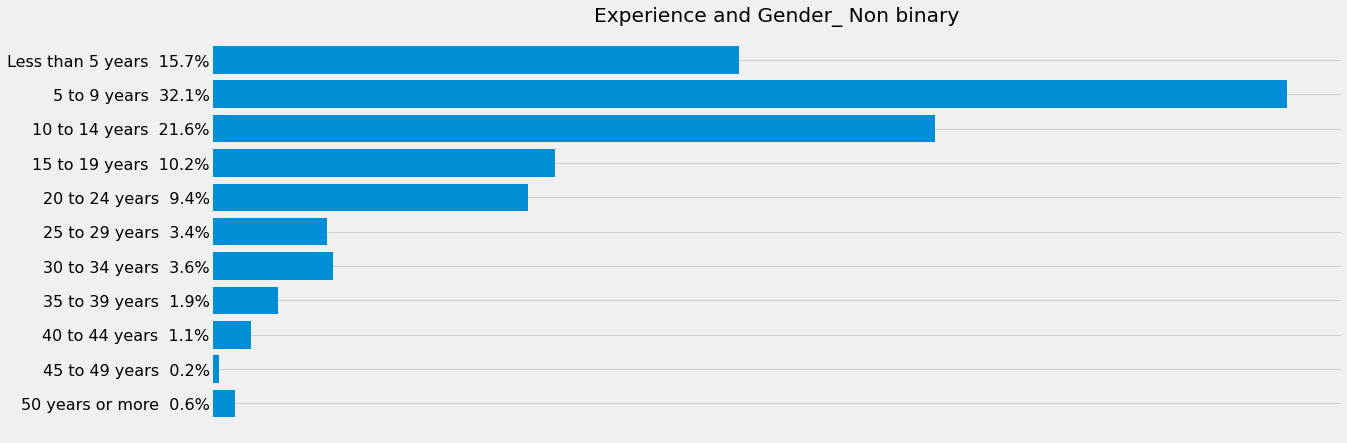

In [75]:
years_of_coding = data["YearsCode"] #calling data from years of coding
years_of_coding.dropna(inplace = True) #filtering the data from empty and unnecessary answers

yearscode_non_binary = data[(years_of_coding != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming") | 
(data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))] #combining years of coding and gender's data 
Yearscode_non_binary = yearscode_non_binary["YearsCode"] #save the combined data in new variable

Yearscode_non_binary = np.where(Yearscode_non_binary == "Less than 1 year", "1", Yearscode_non_binary) # changing "less than 1 year" variable as 1 year
Yearscode_non_binary = np.where(Yearscode_non_binary == "More than 50 years", "50", Yearscode_non_binary) # changing "more then 50 years" variable as 50 years

#calling the function to sort the data
logics_for_less_than_5s(Yearscode_non_binary)

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse() 

Build_Barh_sizes(key_Phrases, Quantity, Yearscode_non_binary, "fivethirtyeight", False , (18,7), "Experience and Gender_ Non binary") #building barchart

                                            Sexual orientation 

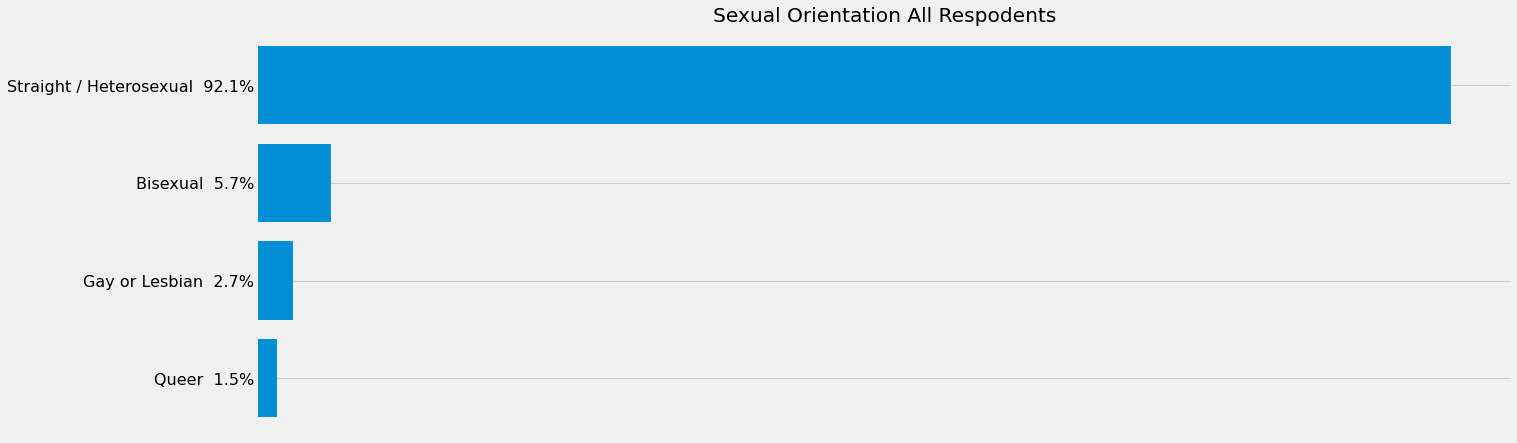

In [76]:
sexual_orientation = data["Sexuality"]  #calling data from sexuality
sexual_orientation.dropna(inplace = True )  #filtering the data from empty and unnecessary answers

sexual_orientation = sexual_orientation.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(sexual_orientation) #autosorting 

Build_Barh_sizes(key_Phrases, Quantity, sexual_orientation, "fivethirtyeight", False , (20,7), "Sexual Orientation All Respodents") #building barcart

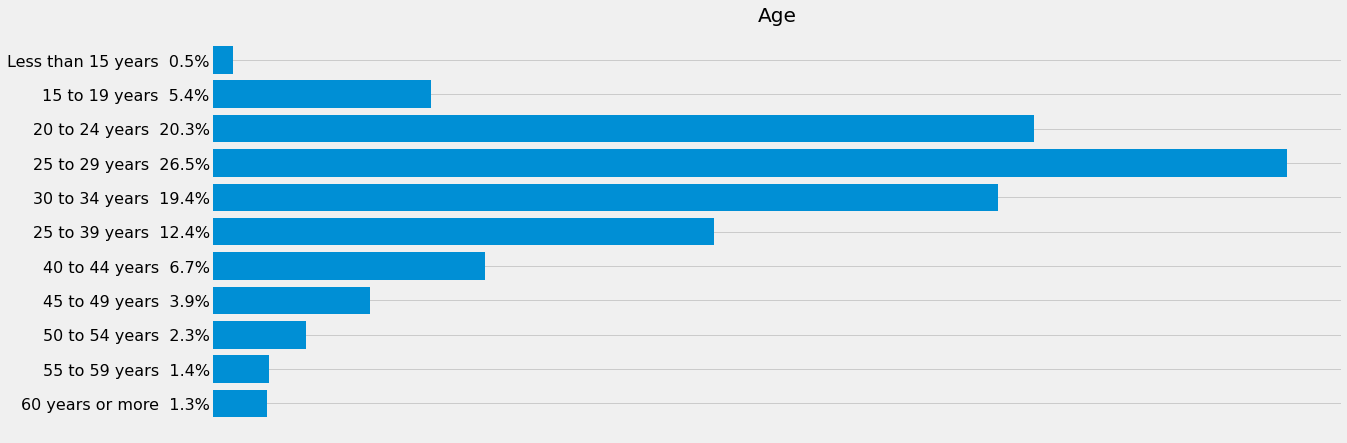

In [78]:
age = data["Age"]  #calling data from age
age.dropna(inplace = True)  #filtering the data from empty and unnecessary answers
logics_for_ages(age)
#calling the function to sort the data
logics_for_ages(age)

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, age, "fivethirtyeight", False , (18,7), "Age") #building barchart


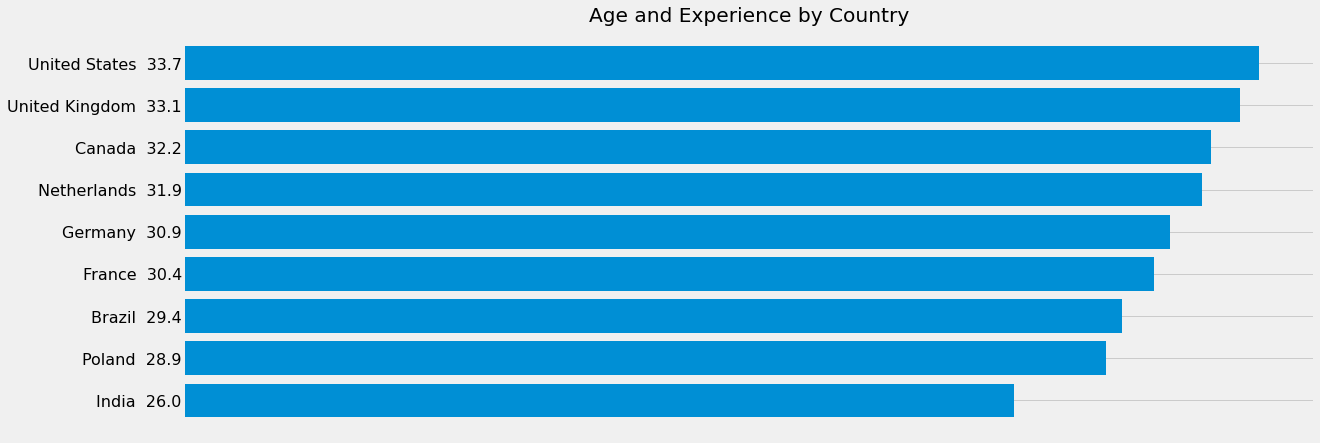

In [80]:
age = data["Age"] #calling data from age
age.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

#creating list which contains countries that I want to get data from
Countries = ["India"  ,  "Poland"  , "Brazil" , "France",  "Germany" , "Netherlands" , "Canada", "United Kingdom" , "United States" ]

#empty lists to add related data later     
key_Phrases = []
Quantity = []


for i in Countries:
    age_by_countries = data[(age != "nan") & (data["Country"] == i)] #combining datas from  age and country from previous list. 
    Age_by_countries = np.array(age_by_countries ["Age"])  #transfers data in list
    Age_by_countries = list(map(int, Age_by_countries)) #changing variables from string to integers

    number_of_people = len(Age_by_countries)  #number of respodents
    all_ages = sum(Age_by_countries)           #sum all ages

    average_age =round(all_ages / number_of_people , 1)  #calculating average age

    key_Phrases.append(i)        #adding counties from previous list as key phrases
    Quantity.append(average_age) #adding average ages to quantity list

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Age and Experience by Country") #building barchart

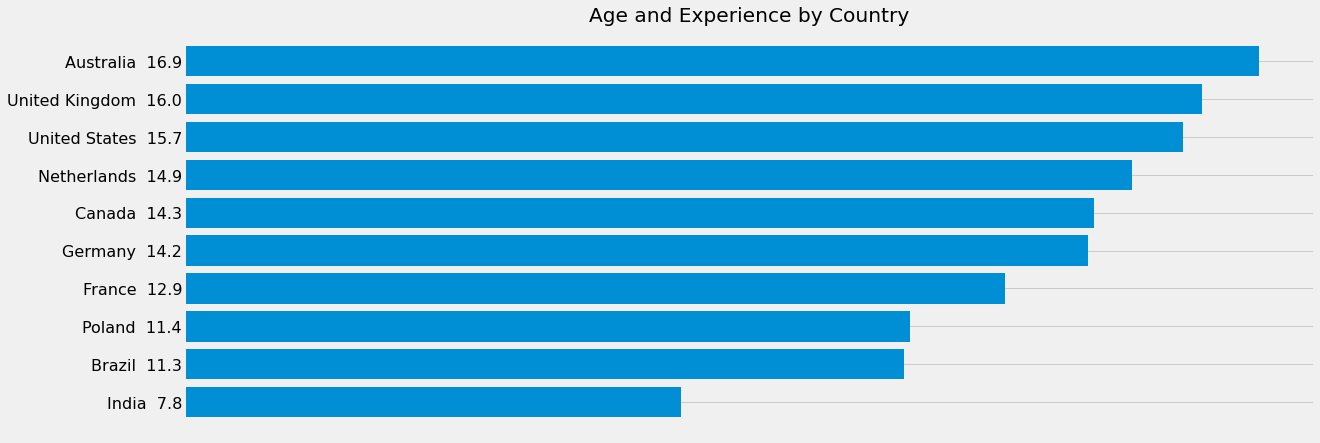

In [90]:
years_of_coding = data["YearsCode"] #calling data from age
years_of_coding.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

#creating list which contains countries that I want to get data from
Countries = ["India"  ,  "Brazil"  , "Poland" , "France",  "Germany" , "Canada" , "Netherlands", "United States" , "United Kingdom" , "Australia"]


#empty lists to add related data later     
key_Phrases = []
Quantity = []


for i in Countries:
    years_code_by_countries = data[(years_of_coding != "nan") & (data["Country"] == i)] #combining datas from  age and country from previous list. 
    
    Years_code_by_countries = np.array(years_code_by_countries ["YearsCode"])  #transfers data in list
    Years_code_by_countries = np.where(Years_code_by_countries == "Less than 1 year", "1", Years_code_by_countries) # changing "less than 1 year" variable as 1 year
    Years_code_by_countries = np.where(Years_code_by_countries == "More than 50 years", "50", Years_code_by_countries) # changing "more then 50 years" variable as 50 years
 
    Years_code_by_countries = list(map(int, Years_code_by_countries)) #changing variables from string to integers

    number_of_people = len(Years_code_by_countries)  #number of respodents
    all_ages = sum(Years_code_by_countries)           #sum all ages

    average_age =round(all_ages / number_of_people , 1)  #calculating average age

    key_Phrases.append(i)        #adding counties from previous list as key phrases
    Quantity.append(average_age) #adding average ages to quantity list

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Average Years of Coding Experience") #building barchart